<img src="https://staticg.sportskeeda.com/editor/2022/01/0bab4-16413888728520-1920.jpg" alt="logo" style="width: 500px;"/>



### Put on your metaphorical Central Perk apron and let's make some weather predictions! 

In [1]:
"""
Importing the seaborn library for data visualization. 
Just like how Ross loves his dinosaurs, we love plotting!
"""
import seaborn as sns

In [2]:
"""
Importing the pandas library for data manipulation. 
It's like Monica's organizational skills but for data!
"""
import pandas as pd 

In [3]:
""" 
Importing the numpy library for mathematical operations. 
Similar to Joey's acting skills, numpy adds a touch of versatility to our code.
"""
import numpy as np 

### Channel our inner Phoebe Buffay 

Just like how the gang navigated through the twists and turns of life in the iconic American sitcom "Friends," we will navigate through the atmospheric conditions and make predictions.

<img src="https://media.tenor.com/qocNUm88fRAAAAAd/phoebe-buffay-phoebe.gif" alt="logo" style="width: 300px;"/>


In [4]:
"""
Reading the weather data from a CSV file named "weatherHistory.csv". 
It's like Rachel reading a fashion magazine, but we're reading weather data!
"""
df = pd.read_csv("weatherHistory.csv")

# It's like Chandler making a sarcastic comment, giving us a quick overview of the data.
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Let's peek into the data

<img src="https://img.buzzfeed.com/buzzfeed-static/static/2014-02/enhanced/webdr06/21/11/enhanced-buzz-11209-1393000610-3.jpg" alt="logo" style="width: 350px;"/>

In [5]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [28]:
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

<Axes: >

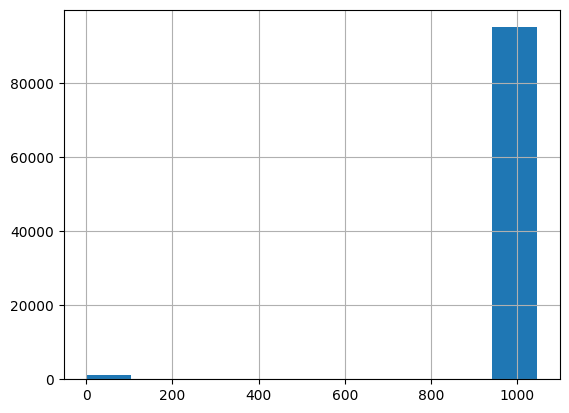

In [6]:
df['Pressure (millibars)'].hist()

<Axes: >

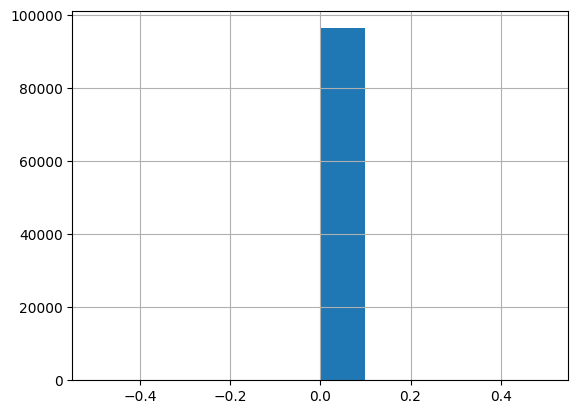

In [7]:
df['Loud Cover'].hist()

<Axes: >

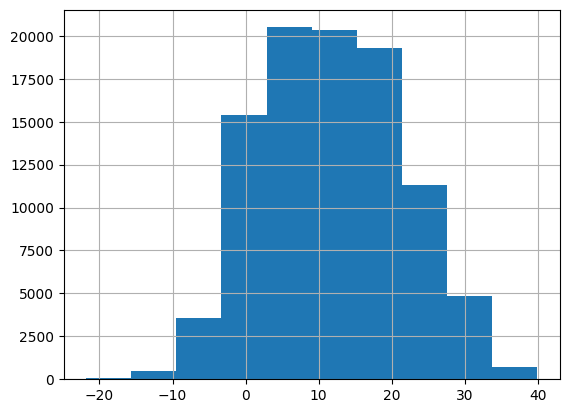

In [8]:
df['Temperature (C)'].hist()

<Axes: >

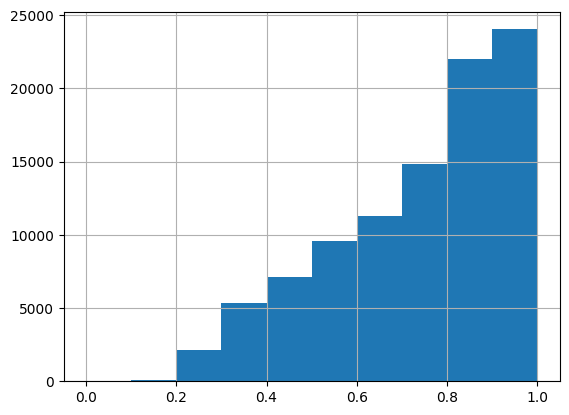

In [9]:
df['Humidity'].hist()

### Data pre-processing

It's like Phoebe embracing her free-spirited nature, where we are focussing on the essentials.

<img src="https://hellogiggles.com/wp-content/uploads/sites/7/2016/05/08/phoebe-buffay-friends-plan.gif" alt="logo" style="width: 350px;"/>



In [10]:
df = df.drop(['Summary','Precip Type', 'Formatted Date', 'Apparent Temperature (C)', 'Daily Summary', 'Loud Cover'], axis= 1)
df.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,8.755556,0.83,11.0446,259.0,15.8263,1016.51


It's like Ross trying to scientifically analyze the situation before making a decision.

<img src="https://i0.wp.com/www.ourmovielife.com/wp-content/uploads/2020/03/unagi.jpg?resize=800%2C500&ssl=1" alt="logo" style="width: 350px;"/>

In [11]:
pressure_median = df['Pressure (millibars)'].median()
pressure_median

1016.45

Just like how Phoebe handles every situation

<img src="https://preview.redd.it/07w1wj2pdrv41.jpg?auto=webp&s=f0d77cc50df65807c34f9ef8ed9c33214264f33b" alt="logo" style="width: 300px;"/>

In [12]:
# This function ensures that any zero pressure values are replaced with the median value. 

def pressure(x):
    if x==0:
        return x + pressure_median
    else:
        return x
        
df["Pressure (millibars)"] = df.apply(lambda row:pressure(row["Pressure (millibars)"]) , axis = 1)

In [13]:
df = df.round({"Temperature (C)" : 3, "Wind Speed (km/h)" : 0, "Pressure (millibars)" : 0, "Visibility (km)" : 0})
df.head()

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,9.472,0.89,14.0,251.0,16.0,1015.0
1,9.356,0.86,14.0,259.0,16.0,1016.0
2,9.378,0.89,4.0,204.0,15.0,1016.0
3,8.289,0.83,14.0,269.0,16.0,1016.0
4,8.756,0.83,11.0,259.0,16.0,1017.0


### Let's start training

<img src="https://64.media.tumblr.com/a2c015969a2255a35a16726041984b86/tumblr_mhj7n7icXJ1qlzc82o1_500.gif" alt="logo" style="width: 300px;"/>

In [14]:
from sklearn.model_selection import train_test_split
X = df.drop(['Temperature (C)'], axis=1)
y = df['Temperature (C)']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)
X_test.head()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
38820,0.45,4.0,290.0,11.0,1011.0
55191,1.00,18.0,190.0,1.0,1024.0
76539,0.77,16.0,320.0,10.0,1011.0
87536,0.59,14.0,322.0,10.0,1014.0
77688,1.00,6.0,101.0,1.0,1028.0


In [15]:
X_test.columns

Index(['Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',
       'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

# u = ((y_test - y_predicted) ** 2).sum()
# v = ((y_test - y_test.mean()) ** 2).sum()
# score = 1 - (u/v)


0.5406286732680008


### Predictions & evaluation

<img src="https://thumbs.gfycat.com/EveryFondBarasinga-size_restricted.gif" alt="logo" style="width: 300px; height: 300px;"/>
<img src="https://i.pinimg.com/originals/c0/bb/35/c0bb35395db801455b609330363025b1.gif" alt="logo" style="width: 350px; height: 300px;"/>


In [17]:
# This step measures how well our model's predictions fit the actual values. 
## It's like Phoebe channeling her mystical powers to find the perfect harmony between predictions and reality.

from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R2 score:", r2)

R2 score: 0.5406286732680008


<img src="https://www.statisticshowto.com/wp-content/uploads/2016/10/MAE.png" alt="logo" style=""/>

In [18]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 5.179663545889522


#### Remember, just like Joey's confidence, our predictions may not always be accurate, but they will definitely bring a smile to your face.

<img src="https://cdn4.whatculture.com/images/2018/10/46b238b1cae3dc75-600x338.jpg" alt="logo" style="width: 350px; height: 300px;"/>

In [43]:
import joblib
joblib.dump(model,'model_v2.pkl')

['model_v2.pkl']

<img src="model.png" alt="logo" style="width: 500px; height: 350px;"/>

<img src="model_dump.png" alt="logo" style="width: 500px; height: 350px;"/>